In [1]:
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

from bs4 import BeautifulSoup
import csv

!pip install geocoder
import geocoder # to get longitude and latitude

!conda install -c conda-forge folium=0.5.0 --yes
import folium # Map plotting library
import numpy as np
from pandas.io.json import json_normalize # Tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# Import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.



ModuleNotFoundError: No module named 'folium'

In [2]:
python3 -m pip install folium

SyntaxError: invalid syntax (<ipython-input-2-d05c9e64e4c2>, line 1)

In [3]:
!pip install folium

     |████████████████████████████████| 94 kB 6.8 MB/s  eta 0:00:01


In [4]:
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

from bs4 import BeautifulSoup
import csv

!pip install geocoder
import geocoder # to get longitude and latitude

!conda install -c conda-forge folium=0.5.0 --yes
import folium # Map plotting library
import numpy as np
from pandas.io.json import json_normalize # Tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# Import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

     |████████████████████████████████| 98 kB 12.0 MB/s eta 0:00:01
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-main

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.2               |     pyhd8ed1ab_0          26 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         713 KB

The following NEW packages will be INS

In [5]:
source = requests.get('https://en.wikipedia.org/wiki/Category:Areas_of_Manchester').text 
soup = BeautifulSoup(source, 'lxml')

In [6]:
csv_file = open('manchester.csv', 'w')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['Neighbourhood'])

15

In [7]:
mwcg = soup.find_all(class_ = "mw-category-group")

length = len(mwcg) # Gets the length of number of `mw-category-groups` present

for i in range(1, length):  # Gets all the neighbourhoods
    lists = mwcg [i].find_all('a')
    for list in lists:
        nbd = list.get('title') # Gets the title of the neighbourhood
        csv_writer.writerow([nbd]) # Writes the name of the neighbourhood in the csv file

In [8]:
csv_file.close()

In [9]:
manchester_raw = pd.read_csv('manchester.csv')

In [10]:
manchester_raw.shape

(64, 1)

In [11]:
manchester_raw

,Neighbourhood
0,Baguley
1,Barlow Moor
2,"Belle Vue, Manchester"
3,Benchill
4,"Beswick, Manchester"
5,Blackley
6,Bradford-with-Beswick
7,"Bradford, Manchester"
8,Brooklands (Manchester ward)
9,Burnage


In [12]:
# Initialize varialbes
lat = []
lng = []
lat_lng_coords = None

# Get postcodes from neighbourhoods table
neighbourhoods = manchester_raw['Neighbourhood']

# Store latitude and longitude values in lat and lng
for nh in neighbourhoods:
    g = geocoder.arcgis('{}, Manchester, UK'.format(nh))
    lat_lng_coords = g.latlng
    lat.append(lat_lng_coords[0])
    lng.append(lat_lng_coords[1])

In [13]:
man_data = manchester_raw
man_data['Latitude'] = lat
man_data['Longitude'] = lng

In [14]:
man_data.head()

,Neighbourhood,Latitude,Longitude
0,Baguley,53.399090,-2.285610
1,Barlow Moor,53.422201,-2.246093
2,"Belle Vue, Manchester",42.955853,-71.459019
3,Benchill,53.381730,-2.261250
4,"Beswick, Manchester",53.478390,-2.200320


In [15]:
CLIENT_ID = 'JW1LOUKCHOBJJGPYYZFROQZINFPN0AU4E44WNXM51NPILF3W' # your Foursquare ID
CLIENT_SECRET = 'QEEXIE4ODGP1UZVI35RD0OQL2XS2WQWE3ZNAQ3T4CMSOMZNJ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JW1LOUKCHOBJJGPYYZFROQZINFPN0AU4E44WNXM51NPILF3W
CLIENT_SECRET:QEEXIE4ODGP1UZVI35RD0OQL2XS2WQWE3ZNAQ3T4CMSOMZNJ


In [16]:
from geopy.geocoders import Nominatim

address = 'Manchester, UK'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manchester are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manchester are 53.4794892, -2.2451148.


In [17]:
man_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(man_data['Latitude'], man_data['Longitude'], man_data['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(man_map)  
    
man_map

In [18]:
# Gets the name of the category

def get_category_type(row):
    categories_list = row['Category']  
    
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [19]:
explore_df_list = []

for i, nhood_name in enumerate(man_data['Neighbourhood']):  
    
    try :
        #Get neighbourhood data
        nhood_name = man_data.loc[i, 'Neighbourhood']
        nhood_lat = man_data.loc[i, 'Latitude']
        nhood_lng = man_data.loc[i, 'Longitude']

        radius = 1000 
        LIMIT = 30 

        url = 'https://api.foursquare.com/v2/venues/explore?client_id={} \
        &client_secret={}&ll={},{}&v={}&radius={}&limit={}'\
        .format(CLIENT_ID, CLIENT_SECRET, nhood_lat, nhood_lng, VERSION, radius, LIMIT)

        results = json.loads(requests.get(url).text)
        results = results['response']['groups'][0]['items']

        nearby = json_normalize(results) # Flatten JSON

        # Filter the columns
        filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
        nearby = nearby.loc[:, filtered_columns]

        # Rename the columns
        columns = ['Name', 'Category', 'Latitude', 'Longitude']
        nearby.columns = columns

        # Get the categories
        nearby['Category'] = nearby.apply(get_category_type, axis=1)    

        # Get the required data
        for i, name in enumerate(nearby['Name']):
            s_list = nearby.loc[i, :].values.tolist()  # Converts the numpy array to a python list
            f_list = [nhood_name, nhood_lat, nhood_lng] + s_list
            explore_df_list.append(f_list)
    
    except Exception as e:
        pass

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:21: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


In [20]:
explore_man = pd.DataFrame([item for item in explore_df_list])
explore_man.columns = ['Neighbourhood', 'Neighbourhood Latitude', 'Neighbourhood Longitude', 'Venue Name', 'Venue Category', 'Venue Latitude', 'Venue Longitude']
explore_man.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue Name,Venue Category,Venue Latitude,Venue Longitude
0,Baguley,53.39909,-2.28561,McDonald's,Fast Food Restaurant,53.400461,-2.289088
1,Baguley,53.39909,-2.28561,Lidl,Supermarket,53.400455,-2.295649
2,Baguley,53.39909,-2.28561,Wythenshawe Park,Park,53.404952,-2.279563
3,Baguley,53.39909,-2.28561,B&M Store,Furniture / Home Store,53.401589,-2.299105
4,Baguley,53.39909,-2.28561,Costa Coffee,Coffee Shop,53.400795,-2.295027


In [21]:
man_1hot = pd.get_dummies(explore_man[['Venue Category']], prefix="", prefix_sep="")


# Add neighbourhood column back to dataframe
man_1hot['Neighbourhood'] = explore_man['Neighbourhood'] 


# Move neighbourhood column to the first column
fixed_columns = [man_1hot.columns[-1]] + man_1hot.columns[:-1].values.tolist()
man_1hot = man_1hot[fixed_columns]

man_1hot.head()

,Neighbourhood,Airport,Airport Lounge,Airport Service,Airport Terminal,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Store,Bike Shop,Bistro,Bookstore,Boutique,Bowling Green,Brazilian Restaurant,Brewery,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Café,Caribbean Restaurant,Cheese Shop,Child Care Service,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,Comedy Club,Concert Hall,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Donut Shop,Duty-free Shop,Electronics Store,English Restaurant,Entertainment Service,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food & Drink Shop,Food Court,Fried Chicken Joint,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,Go Kart Track,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Hardware Store,History Museum,Home Service,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Lake,Lebanese Restaurant,Light Rail Station,Liquor Store,Malay Restaurant,Market,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Monument / Landmark,Multiplex,Museum,Music Venue,Nature Preserve,Other Repair Shop,Outdoor Supply Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pie Shop,Piercing Parlor,Pizza Place,Playground,Plaza,Pool,Pop-Up Shop,Portuguese Restaurant,Pub,Racetrack,Record Shop,Rental Car Location,Restaurant,River,Sandwich Place,Science Museum,Shoe Store,Shopping Mall,Shopping Plaza,Snack Place,Soccer Field,Soccer Stadium,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Toy / Game Store,Track Stadium,Train Station,Tram Station,Turkish Restaurant,Used Auto Dealership,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Yoga Studio
0,Baguley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Baguley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Baguley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Baguley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Baguley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
man_grouped = man_1hot.groupby('Neighbourhood').mean().reset_index()
man_grouped.head()

,Neighbourhood,Airport,Airport Lounge,Airport Service,Airport Terminal,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Store,Bike Shop,Bistro,Bookstore,Boutique,Bowling Green,Brazilian Restaurant,Brewery,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Café,Caribbean Restaurant,Cheese Shop,Child Care Service,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,Comedy Club,Concert Hall,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Donut Shop,Duty-free Shop,Electronics Store,English Restaurant,Entertainment Service,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food & Drink Shop,Food Court,Fried Chicken Joint,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,Go Kart Track,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Hardware Store,History Museum,Home Service,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Lake,Lebanese Restaurant,Light Rail Station,Liquor Store,Malay Restaurant,Market,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Monument / Landmark,Multiplex,Museum,Music Venue,Nature Preserve,Other Repair Shop,Outdoor Supply Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pie Shop,Piercing Parlor,Pizza Place,Playground,Plaza,Pool,Pop-Up Shop,Portuguese Restaurant,Pub,Racetrack,Record Shop,Rental Car Location,Restaurant,River,Sandwich Place,Science Museum,Shoe Store,Shopping Mall,Shopping Plaza,Snack Place,Soccer Field,Soccer Stadium,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Toy / Game Store,Track Stadium,Train Station,Tram Station,Turkish Restaurant,Used Auto Dealership,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Yoga Studio
0,Baguley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.055556,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.111111,0.000000,0.055556,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.055556,0.000000,0.0,0.0,0.0,0.0,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.055556,0.0,0.0,0.0,0.055556,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.055556,0.0,0.0,0.000000,0.055556,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.111111,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.166667,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
1,Barlow Moor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.000000,0.0,0.033333,0.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.033333,0.000000,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.066667,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.033333,0.0,0.0,0.066667,0.000000,0.1,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.033333,0.000000,0.0,0.0,0.0,0.033333,0.000000,0.0,0.0,0.0,0.0,0.133333,0.0,0.0,0.000000,0.033333,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.033333,0.

In [23]:
def top_common_venues(row, top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:top_venues]

In [24]:
top_venues = 10
indicators = ['st', 'nd', 'rd']

# Create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# Create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = man_grouped['Neighbourhood']

for ind in np.arange(man_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = top_common_venues(man_grouped.iloc[ind, :], top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Baguley,Tram Station,Supermarket,Clothing Store,Pet Store,Fast Food Restaurant,Donut Shop,Furniture / Home Store,Park,Hardware Store,Bowling Green
1,Barlow Moor,Pub,Italian Restaurant,Bar,Deli / Bodega,Indian Restaurant,Cupcake Shop,Boutique,Pizza Place,Restaurant,Persian Restaurant
2,"Belle Vue, Manchester",Home Service,Park,Intersection,Playground,Business Service,Market,Pet Store,Persian Restaurant,Other Repair Shop,Outdoor Supply Store
3,Benchill,Discount Store,Tram Station,Fast Food Restaurant,Department Store,Supermarket,Tanning Salon,Coffee Shop,Bakery,Sandwich Place,Market
4,"Beswick, Manchester",Track Stadium,Tram Station,Sporting Goods Shop,Child Care Service,Supermarket,Bus Stop,Café,Soccer Stadium,Chinese Restaurant,Gym / Fitness Center


In [25]:
man_grouped_clustering = man_grouped.drop('Neighbourhood', 1)

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [27]:
max_range = 15 #Max range 15 (number of clusters)

from sklearn.metrics import silhouette_samples, silhouette_score


indices = []
scores = []

for man_clusters in range(2, max_range) :
    
    # Run k-means clustering
    man_gc = man_grouped_clustering
    kmeans = KMeans(n_clusters = man_clusters, init = 'k-means++', random_state = 0).fit_predict(man_gc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(man_gc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(man_clusters)
    scores.append(score)

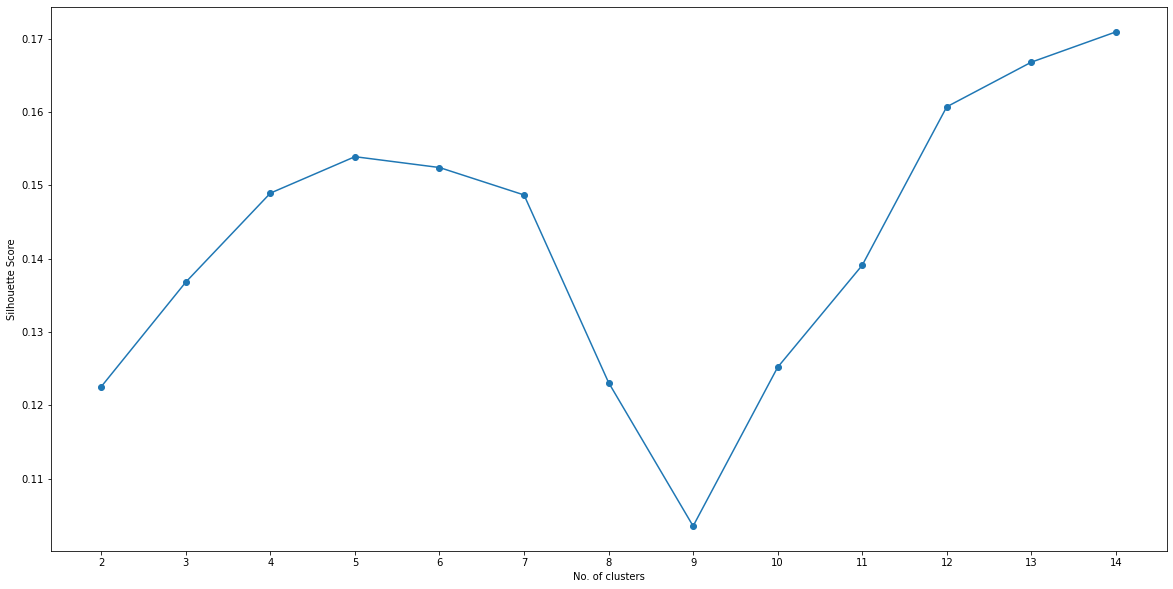

In [28]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

In [29]:
opt_value = 8

In [30]:
man_clusters = opt_value

# Run k-means clustering
man_gc = man_grouped_clustering
kmeans = KMeans(n_clusters = man_clusters, init = 'k-means++', random_state = 0).fit(man_gc)

In [31]:
# Add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [32]:
man_final = man_data
man_final = man_final.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')
man_final.dropna(inplace = True)
man_final['Cluster Labels'] = man_final['Cluster Labels'].astype(int)
man_final.head()

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Baguley,53.399090,-2.285610,3,Tram Station,Supermarket,Clothing Store,Pet Store,Fast Food Restaurant,Donut Shop,Furniture / Home Store,Park,Hardware Store,Bowling Green
1,Barlow Moor,53.422201,-2.246093,0,Pub,Italian Restaurant,Bar,Deli / Bodega,Indian Restaurant,Cupcake Shop,Boutique,Pizza Place,Restaurant,Persian Restaurant
2,"Belle Vue, Manchester",42.955853,-71.459019,6,Home Service,Park,Intersection,Playground,Business Service,Market,Pet Store,Persian Restaurant,Other Repair Shop,Outdoor Supply Store
3,Benchill,53.381730,-2.261250,3,Discount Store,Tram Station,Fast Food Restaurant,Department Store,Supermarket,Tanning Salon,Coffee Shop,Bakery,Sandwich Place,Market
4,"Beswick, Manchester",53.478390,-2.200320,3,Track Stadium,Tram Station,Sporting Goods Shop,Child Care Service,Supermarket,Bus Stop,Café,Soccer Stadium,Chinese Restaurant,Gym / Fitness Center


In [33]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# Setup color scheme for different clusters
x = np.arange(man_clusters)
ys = [i + x + (i*x)**2 for i in range(man_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(man_final['Latitude'], man_final['Longitude'], man_final['Neighbourhood'], 
                                  man_final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' (Cluster ' + str(cluster + 1) + ')', parse_html=True)
    map_clusters.add_child(
        folium.features.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7))
       
map_clusters

In [34]:
val = 1
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Barlow Moor,Pub,Italian Restaurant,Bar,Deli / Bodega,Indian Restaurant,Cupcake Shop,Boutique,Pizza Place,Restaurant,Persian Restaurant
9,Burnage,Pub,Supermarket,Park,Bar,Burger Joint,Train Station,Café,Bistro,Coffee Shop,Toy / Game Store
10,Burnage (ward),Pub,Supermarket,Park,Bar,Burger Joint,Train Station,Café,Bistro,Coffee Shop,Toy / Game Store
22,Didsbury,Pub,Italian Restaurant,Park,Indian Restaurant,Café,Grocery Store,Bistro,Fish & Chips Shop,Coffee Shop,Cheese Shop
23,Fallowfield,Pub,Gym / Fitness Center,Asian Restaurant,Sandwich Place,Fish & Chips Shop,Park,Chinese Restaurant,Greek Restaurant,Bed & Breakfast,Bar
24,"Glenbrook, Greater Manchester",Pub,Light Rail Station,Discount Store,Park,Golf Course,Supermarket,Hotel,Pharmacy,Outdoor Supply Store,Indian Restaurant
26,Great Heaton,Pub,Coffee Shop,Italian Restaurant,Park,Pet Store,Nature Preserve,Other Repair Shop,Outdoor Supply Store,Pastry Shop,Performing Arts Venue
47,Old Moat,Pub,Restaurant,Bar,Italian Restaurant,Grocery Store,Café,Bus Stop,Indian Restaurant,Vegetarian / Vegan Restaurant,Pool
48,Old Moat (ward),Pub,Restaurant,Bar,Italian Restaurant,Grocery Store,Café,Bus Stop,Indian Restaurant,Vegetarian / Vegan Restaurant,Pool
50,Parrs Wood,Pub,Italian Restaurant,Hotel,Park,Bar,Grocery Store,Indian Restaurant,Bistro,Shopping Plaza,Coffee Shop


In [35]:
val = 2
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
25,Gorton,Gym / Fitness Center,Hotel,Park,Supermarket,Fast Food Restaurant,Train Station,Sandwich Place,Bus Stop,Bus Station,Chinese Restaurant
32,Ladybarn,Fast Food Restaurant,Indian Restaurant,Grocery Store,Pub,Asian Restaurant,Park,Supermarket,Pizza Place,Sandwich Place,Fish & Chips Shop
41,New Moston,Hotel,Supermarket,Convenience Store,Pub,Soccer Stadium,Pizza Place,Coffee Shop,Tram Station,Train Station,Malay Restaurant
43,Newton Heath,Supermarket,Bus Stop,Park,Tram Station,Shoe Store,Airport,Performing Arts Venue,Music Venue,Nature Preserve,Other Repair Shop
58,"Victoria Park, Manchester",Pizza Place,Park,Supermarket,Hotel,Bakery,Pub,Sandwich Place,Bus Stop,Golf Course,Dance Studio
59,West Gorton,Gym / Fitness Center,Hotel,Park,Supermarket,Fast Food Restaurant,Train Station,Sandwich Place,Bus Stop,Bus Station,Chinese Restaurant
62,Woodhouse Park,Fast Food Restaurant,Supermarket,Train Station,Gym / Fitness Center,Sandwich Place,Go Kart Track,Hotel,Bus Station,Soccer Stadium,Gymnastics Gym


In [36]:
val = 3
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,"Bradford, Manchester",Hotel,Supermarket,Other Repair Shop,Park,Gym / Fitness Center,Sandwich Place,Flea Market,Entertainment Service,Performing Arts Venue,Music Venue
29,Harpurhey,Building,Hotel,Supermarket,Other Repair Shop,Gym / Fitness Center,Sandwich Place,Flea Market,Park,Pastry Shop,Museum
39,"Moston, Manchester",Hotel,Sandwich Place,Flea Market,Supermarket,Park,Gym / Fitness Center,Entertainment Service,Building,Pharmacy,Pie Shop


In [37]:
val = 4
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Baguley,Tram Station,Supermarket,Clothing Store,Pet Store,Fast Food Restaurant,Donut Shop,Furniture / Home Store,Park,Hardware Store,Bowling Green
3,Benchill,Discount Store,Tram Station,Fast Food Restaurant,Department Store,Supermarket,Tanning Salon,Coffee Shop,Bakery,Sandwich Place,Market
4,"Beswick, Manchester",Track Stadium,Tram Station,Sporting Goods Shop,Child Care Service,Supermarket,Bus Stop,Café,Soccer Stadium,Chinese Restaurant,Gym / Fitness Center
6,Bradford-with-Beswick,Track Stadium,Tram Station,Sporting Goods Shop,Child Care Service,Supermarket,Bus Stop,Café,Soccer Stadium,Chinese Restaurant,Gym / Fitness Center
19,"Clayton, Manchester",Supermarket,Tram Station,Discount Store,Pub,Coffee Shop,Park,Pet Store,Clothing Store,Grocery Store,Gym / Fitness Center
20,Collyhurst,Sporting Goods Shop,Grocery Store,Fast Food Restaurant,Coffee Shop,Clothing Store,Portuguese Restaurant,Pub,Pharmacy,Concert Hall,Sandwich Place
21,Crumpsall,Sandwich Place,Pizza Place,Halal Restaurant,Fried Chicken Joint,Park,River,Tram Station,Bakery,Coffee Shop,Snack Place
30,Highfield Country Park,Gym,Fast Food Restaurant,Grocery Store,Shopping Mall,Chinese Restaurant,Italian Restaurant,Café,Pizza Place,English Restaurant,Bakery
42,Newall Green,Tram Station,Bus Stop,Stationery Store,Convenience Store,Sandwich Place,Coffee Shop,Business Service,Furniture / Home Store,Grocery Store,Pub
45,Northern Moor,Tram Station,Grocery Store,Park,Clothing Store,Fast Food Restaurant,Hotel,Convenience Store,Hardware Store,Lebanese Restaurant,Monument / Landmark


In [38]:
val = 5
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Blackley,Hotel,Coffee Shop,Café,Pharmacy,Grocery Store,Playground,Plaza,Pizza Place,Piercing Parlor,Pie Shop
8,Brooklands (Manchester ward),Plaza,Bar,Coffee Shop,Café,Restaurant,Italian Restaurant,Bookstore,Bike Shop,Steakhouse,Tapas Restaurant
11,Castlefield,Indian Restaurant,Pub,Restaurant,Science Museum,Steakhouse,Hotel,Bar,Japanese Restaurant,Cocktail Bar,Burger Joint
12,"Cheetham, Manchester",Pub,Italian Restaurant,Brewery,Coffee Shop,Bar,Park,Burger Joint,Café,Speakeasy,Food Court
18,Circle Square Manchester,Bar,Pub,Burrito Place,Beer Bar,Museum,Multiplex,Monument / Landmark,Concert Hall,Tea Room,Middle Eastern Restaurant
27,Green Quarter,Pub,Coffee Shop,Bar,Brewery,Department Store,Sandwich Place,Pie Shop,Concert Hall,Donut Shop,Tea Room
28,"Greenheys, Manchester",Music Venue,Coffee Shop,Café,Chinese Restaurant,Pub,Bar,Sandwich Place,Theater,Fast Food Restaurant,College Arts Building
31,Hulme,Pub,Indian Restaurant,Hotel,Café,Bar,Coffee Shop,Fast Food Restaurant,Music Venue,Gastropub,Performing Arts Venue
35,Manchester city centre,Pub,Coffee Shop,Café,Arts & Crafts Store,Restaurant,Pizza Place,Concert Hall,Sandwich Place,Record Shop,Donut Shop
40,New Islington,Coffee Shop,Beer Bar,Bar,Brewery,Tea Room,Pub,Donut Shop,Grocery Store,Park,Convenience Store


In [39]:
val = 6
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Chorlton (ward),Pub,Bar,Pizza Place,Deli / Bodega,Café,Nature Preserve,Grocery Store,Spanish Restaurant,Fish Market,Gastropub
15,Chorlton-cum-Hardy,Pub,Bar,Pizza Place,Deli / Bodega,Café,Nature Preserve,Grocery Store,Spanish Restaurant,Fish Market,Gastropub
16,Chorlton-on-Medlock,Pub,Bar,Pizza Place,Deli / Bodega,Café,Nature Preserve,Grocery Store,Spanish Restaurant,Fish Market,Gastropub
17,Chorltonville,Pub,Bar,Pizza Place,Deli / Bodega,Café,Nature Preserve,Grocery Store,Spanish Restaurant,Fish Market,Gastropub


In [40]:
val = 7
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,"Belle Vue, Manchester",Home Service,Park,Intersection,Playground,Business Service,Market,Pet Store,Persian Restaurant,Other Repair Shop,Outdoor Supply Store
14,Chorlton Park (ward),Grocery Store,Indian Restaurant,Park,Pizza Place,Cosmetics Shop,Convenience Store,Restaurant,Falafel Restaurant,Tea Room,Fish & Chips Shop
33,Levenshulme,Grocery Store,Park,Indian Restaurant,Café,Pub,Antique Shop,Discount Store,Plaza,Bus Stop,Sandwich Place
34,Longsight,Indian Restaurant,Grocery Store,Park,Supermarket,Dessert Shop,Turkish Restaurant,Café,Bakery,Pastry Shop,Gym
36,Merseybank,Hotel,Lake,Bus Station,Outdoor Supply Store,Grocery Store,Fast Food Restaurant,Indian Restaurant,Playground,Pizza Place,Plaza
37,Miles Platting,Men's Store,Park,Thai Restaurant,Tram Station,Airport,Performing Arts Venue,Music Venue,Nature Preserve,Other Repair Shop,Outdoor Supply Store
38,Moss Side,Grocery Store,Discount Store,Brewery,Supermarket,Lake,Café,Sandwich Place,Gym,Park,Tea Room
60,"Whalley Range, Manchester",Bar,Grocery Store,Bus Stop,Park,Caribbean Restaurant,Lake,Asian Restaurant,Sandwich Place,Tram Station,Chinese Restaurant


In [41]:
val = 8
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
44,Northenden,Golf Course,Sandwich Place,Pub,Fish & Chips Shop,Vietnamese Restaurant,Bus Stop,Park,Electronics Store,Café,Airport
53,Sharston,Sandwich Place,Pub,Airport Service,Fish & Chips Shop,Vietnamese Restaurant,Grocery Store,Persian Restaurant,Nature Preserve,Other Repair Shop,Outdoor Supply Store
